In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [3]:
train = pd.read_csv(r"C:\Users\Anoop Jose\Desktop\pyhton_study\db\Housing.csv")
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No presence of null values

In [5]:
train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
numeric_columns = train.select_dtypes(include=['number'])
numeric_features_df = train[numeric_columns.columns]
print(numeric_features_df.head())

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


created new dataframe called numeric_features_df contain numeric values of train dataset

# Prices

<Axes: xlabel='price', ylabel='Count'>

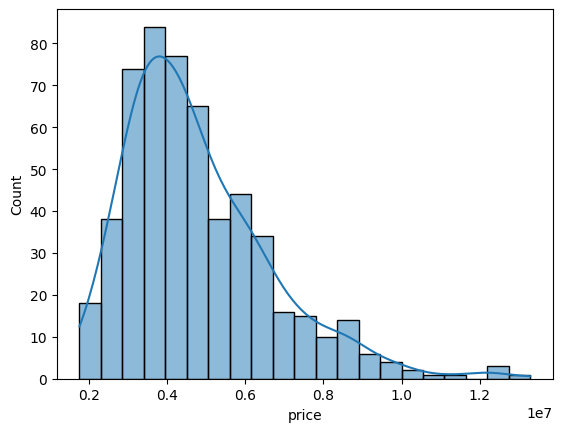

In [7]:
sns.histplot(train['price'], kde=True)


In [8]:
round(train['price'].describe())

count         545.0
mean      4766729.0
std       1870440.0
min       1750000.0
25%       3430000.0
50%       4340000.0
75%       5740000.0
max      13300000.0
Name: price, dtype: float64

Most of the houses are listed between 3.4 and 5.7 

In [9]:
train['price'].first

<bound method NDFrame.first of 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64>

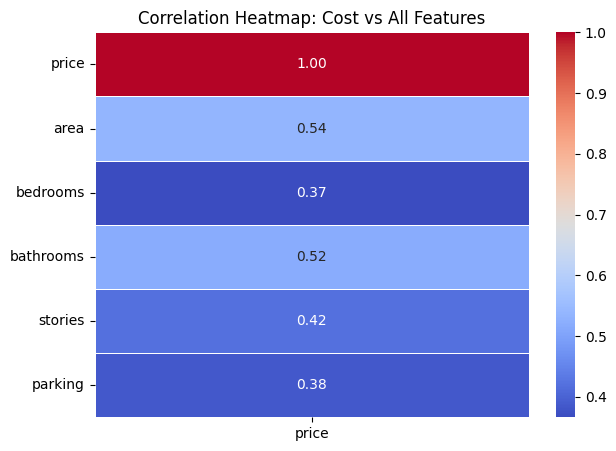

In [10]:

correlation_matrix = numeric_features_df.corr()

# Creating heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Cost vs All Features')
plt.show()

In [11]:
bins = [1750000, 3325000 ,6650000, 9975000, float('inf')]
labels = ['1750k -3325k', '3325k - 6650k', '6650k - 9975k', '9975k+']
train['price_group'] = pd.cut(train['price'], bins=bins, labels=labels)
train['price_group'].value_counts()

price_group
3325k - 6650k    354
1750k -3325k     114
6650k - 9975k     66
9975k+             8
Name: count, dtype: int64

## Area

In [12]:
train['area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 545 entries, 0 to 544
Series name: area
Non-Null Count  Dtype
--------------  -----
545 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [13]:
train['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [14]:
bins = [0 ,2000, 4000, 6000, 8000, 10000, 12000, float('inf')]
labels = ['0-2000','2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 - 10000', '10000 - 12000', '12000+']
train['Area_Group'] = pd.cut(train['area'], bins=bins, labels=labels, include_lowest=True)
print(train[['area', 'Area_Group']])

     area    Area_Group
0    7420   6000 - 8000
1    8960  8000 - 10000
2    9960  8000 - 10000
3    7500   6000 - 8000
4    7420   6000 - 8000
..    ...           ...
540  3000   2000 - 4000
541  2400   2000 - 4000
542  3620   2000 - 4000
543  2910   2000 - 4000
544  3850   2000 - 4000

[545 rows x 2 columns]


In [15]:
train['Area_Group'].value_counts()

Area_Group
2000 - 4000      200
4000 - 6000      181
6000 - 8000      104
8000 - 10000      35
10000 - 12000     11
0-2000             7
12000+             7
Name: count, dtype: int64

<Axes: xlabel='area', ylabel='Count'>

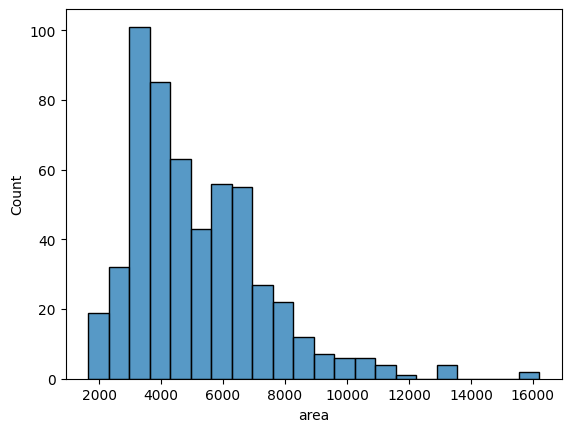

In [16]:
sns.histplot(train['area'])

In [17]:
train[['Area_Group', 'price']].groupby(['Area_Group']).mean()

,price
Area_Group,
0-2000,2.855000e+06
2000 - 4000,3.622238e+06
4000 - 6000,4.948014e+06
6000 - 8000,6.063812e+06
8000 - 10000,6.191400e+06
10000 - 12000,5.681455e+06
12000+,6.859000e+06


Economical is 2000 to 4000 sq.ft. 
bigghest insight is rate of big houses are low, when it compares with 10000 - 12000 with 6000 - 8000 and 8000 - 10000 

## Airconditioning

In [18]:
train['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [19]:
airconditioning_train = train[['airconditioning', 'price']].groupby(['airconditioning'], as_index = False).mean()
airconditioning_train['price'] = round(airconditioning_train['price'])
airconditioning_train

,airconditioning,price
0,no,4191940.0
1,yes,6013221.0


In [20]:
label_encoder = LabelEncoder()
train['airconditioning'] = label_encoder.fit_transform(train['airconditioning'])
train['airconditioning'].head()

0    1
1    1
2    0
3    1
4    1
Name: airconditioning, dtype: int32

In [21]:
original_value = label_encoder.inverse_transform([0])
print(original_value)

['no']


0 for "no" and 1 for "yes"

## Bedrooms

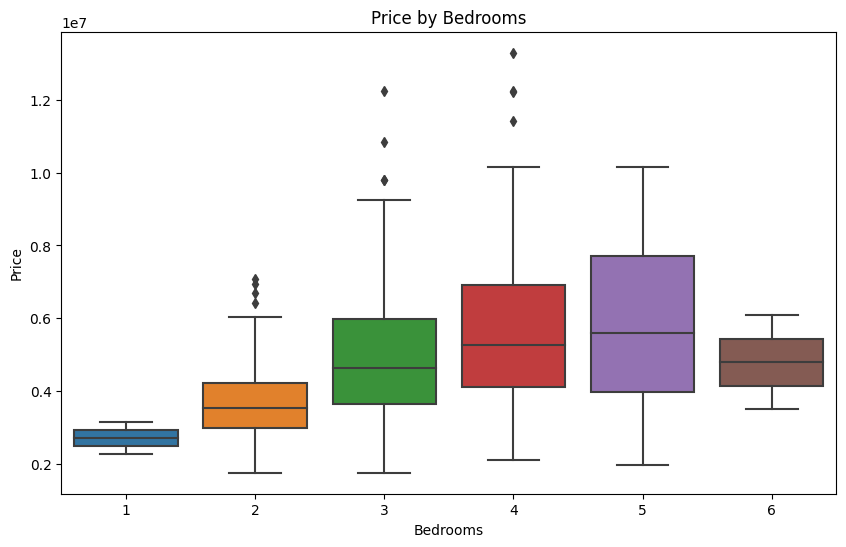

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=train)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

house having bedrooms 6 had low rate

In [23]:
bedroom_count = train['bedrooms'].value_counts()
bedroom_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

majority of houses having 3 bedrooms

## bathrooms

In [24]:
train['bathrooms'].describe()

count    545.000000
mean       1.286239
std        0.502470
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: bathrooms, dtype: float64

In [25]:
train['bathrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 545 entries, 0 to 544
Series name: bathrooms
Non-Null Count  Dtype
--------------  -----
545 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


<Axes: xlabel='bedrooms', ylabel='bathrooms'>

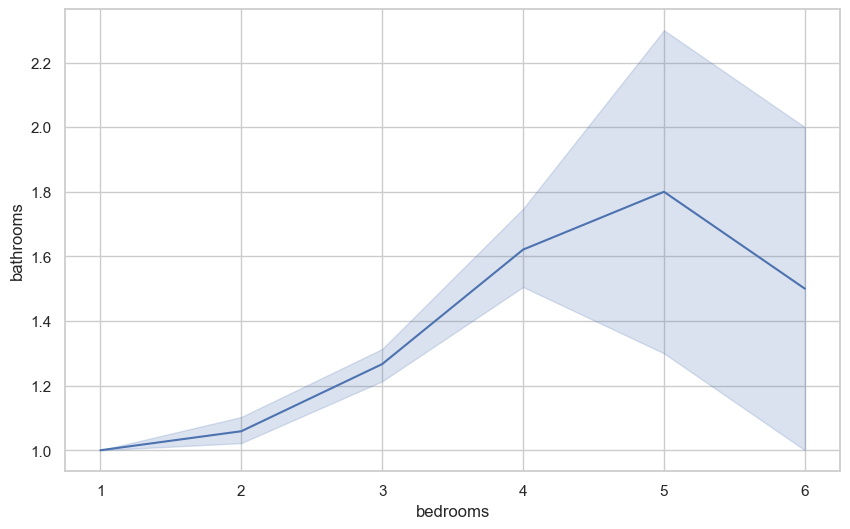

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='bedrooms', y='bathrooms', data=train)



In [27]:
train[(train['bedrooms'] == 6) & (train['bathrooms']<4)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_group,Area_Group
112,6083000,4300,6,2,2,yes,no,no,no,0,0,no,furnished,3325k - 6650k,4000 - 6000
395,3500000,3600,6,1,2,yes,no,no,no,0,1,no,unfurnished,3325k - 6650k,2000 - 4000


values of these 2 rows are little confussing, bedroom counts are 6, but area is too low. I think these are wrong entries

## stories

In [28]:
stories_mean = train[['stories', 'price']].groupby(['stories']).mean()
stories_mean

,price
stories,
1,4.170659e+06
2,4.764074e+06
3,5.685436e+06
4,7.208450e+06


In [29]:
stories_count = train[['stories', 'price']].groupby(['stories']).count()
stories_count

,price
stories,
1,227
2,238
3,39
4,41


2storied buildings are common

In [30]:
stories_detail = pd.merge(stories_mean, stories_count, on = 'stories')
stories_detail = stories_detail.rename(columns = {'price_x': 'price', 'price_y': 'count_of'})
stories_detail['price'] = round(stories_detail['price'])
stories_detail

,price,count_of
stories,,
1,4170659.0,227
2,4764074.0,238
3,5685436.0,39
4,7208450.0,41


as stories increases price also increases

In [31]:
train[train['stories'] == 4][['area']].mean()

area    6506.170732
dtype: float64

<Axes: xlabel='stories', ylabel='price'>

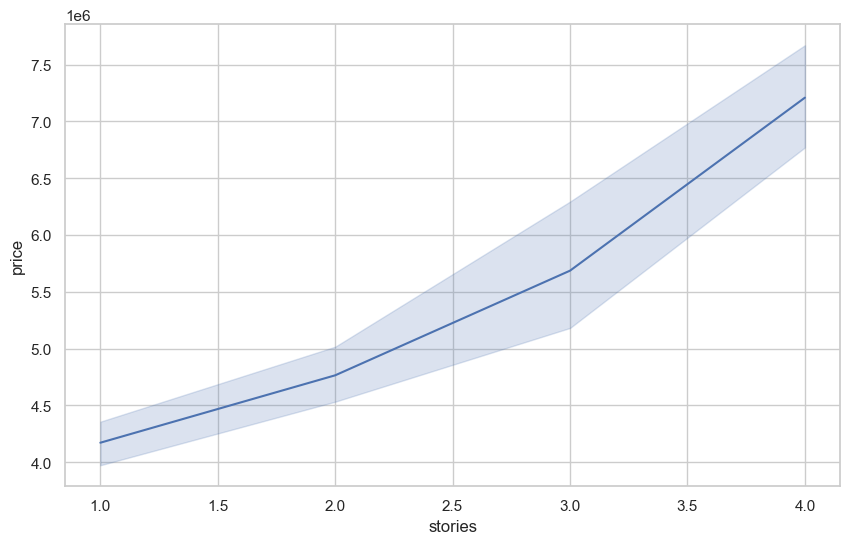

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='stories', y='price', data=train)

In [33]:
# sns.scatterplot(x='area', y='stories', data=train, color='blue', marker='o')

<Axes: xlabel='stories', ylabel='area'>

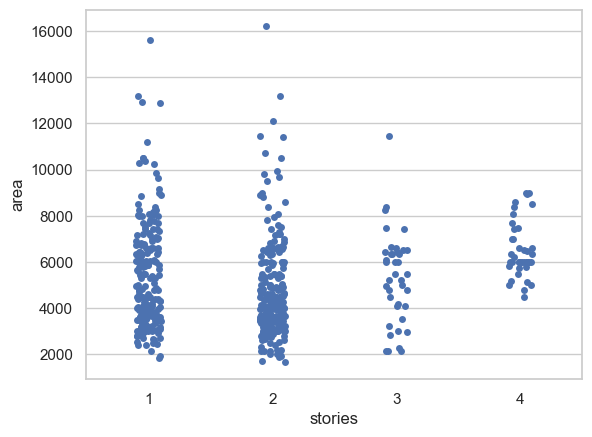

In [34]:
sns.stripplot(x="stories", y="area",
             data=train)

most of the 4 stories building had an area between 5000 and 9000, 

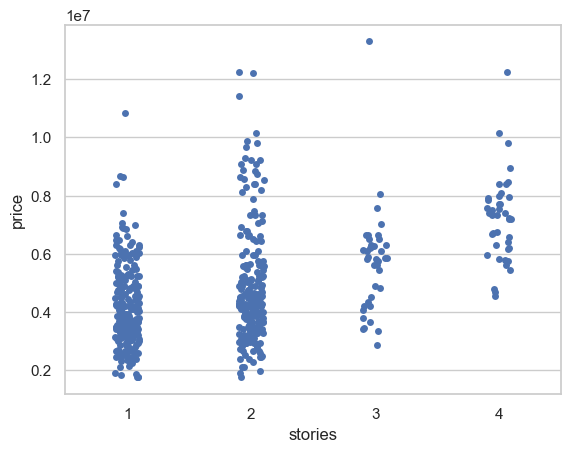

In [35]:
# sns.scatterplot(x='stories', y='price', data=train, color='blue', marker='o', s=100)
sns.set(style = 'whitegrid') 

sns.stripplot(x="stories", y="price",
              data=train)
plt.show()

## mainroad

In [36]:
train['mainroad'].isnull().value_counts()

mainroad
False    545
Name: count, dtype: int64

In [37]:
# encoded_data = pd.get_dummies( train,columns=['Area_Group', 'mainroad','guestroom','basement','hotwaterheating','prefarea','furnishingstatus'])
# encoded_data.columns

In [38]:
train['mainroad'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 545 entries, 0 to 544
Series name: mainroad
Non-Null Count  Dtype 
--------------  ----- 
545 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


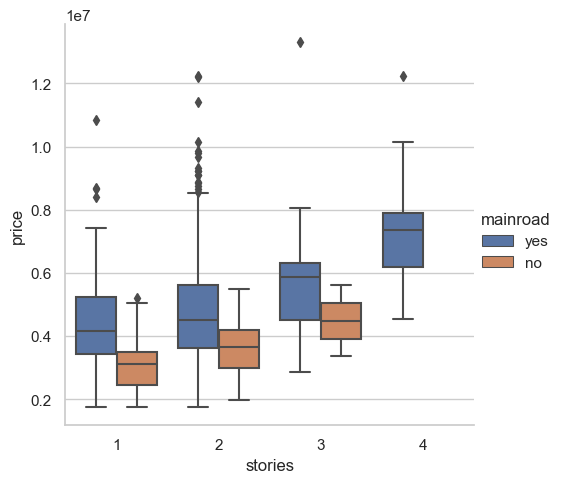

In [39]:
sns.catplot(data = train, x = "stories", y = "price", hue = "mainroad", kind = "box")

insight: houses having 4 stories are not on mainroad. and the houses that are not near main road have a low price comparing to mainroad houses.

In [40]:
train['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [41]:
train_msp = train[['mainroad', 'stories']].groupby(['stories', 'mainroad'], as_index = False).value_counts()
train_msp

,stories,mainroad,count
0,1,no,37
1,1,yes,190
2,2,no,38
3,2,yes,200
4,3,no,2
5,3,yes,37
6,4,yes,41


In [42]:
train_msp = train[['mainroad', 'stories', 'parking']].groupby(['stories', 'mainroad'], as_index = False).value_counts()
# train_msp[(train_msp['parking']>0) & (train_msp['mainroad'] == "yes")]
train_msp

,stories,mainroad,parking,count
0,1,no,0,29
1,1,no,1,7
2,1,no,2,1
3,1,yes,0,98
4,1,yes,2,48
5,1,yes,1,38
6,1,yes,3,6
7,2,no,0,27
8,2,no,1,11
9,2,yes,0,104


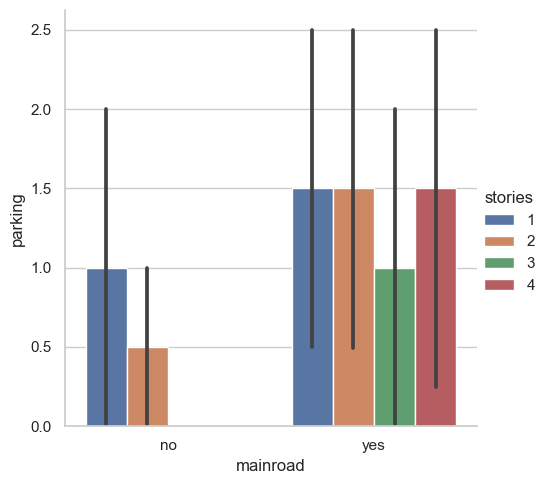

In [43]:
sns.catplot(x="mainroad", y="parking", hue="stories", kind="bar", data=train_msp)

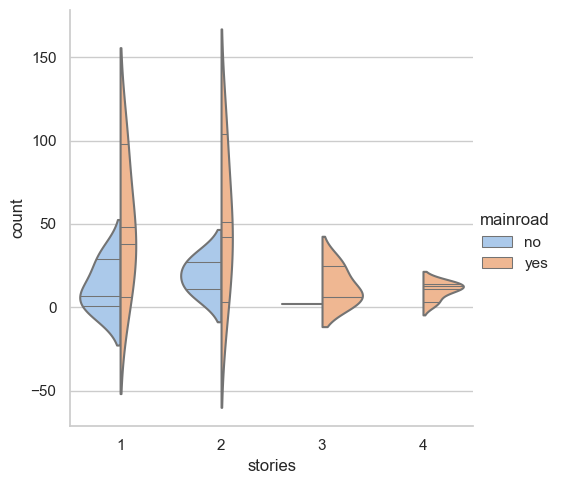

In [44]:
sns.catplot(x="stories", y="count", hue="mainroad",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=train_msp)

its the comparision between mainroad, parking and stories. 
output:1. most of the houses are located near mainroad.
2. Every 3 storied(one exception) and 4 storied buildings have parking

In [45]:
label_encoder = LabelEncoder()
train['parking01'] = label_encoder.fit_transform(train['parking'])
train['parking01'].value_counts()

parking01
0    299
1    126
2    108
3     12
Name: count, dtype: int64

## basement 

In [46]:
train['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [47]:
label_encoder = LabelEncoder()
train['basement'] = label_encoder.fit_transform(train['basement'])
train['basement'].head()

0    0
1    0
2    1
3    1
4    1
Name: basement, dtype: int32

majority of houses dont have basement

In [48]:
mean_prices = train[['basement', 'price']].groupby(['basement'],  as_index = False).mean()
# pd.options.display.float_format = '${:,.2f}'.format
print(mean_prices)

   basement         price
0         0  4.509966e+06
1         1  5.242615e+06


In [49]:
correlation = train['basement'].corr(train['price'])
print("Correlation between 'basement' and 'price':", correlation)

Correlation between 'basement' and 'price': 0.18705659793805288


In [50]:

# train[['basement', 'bedrooms']].groupby(['basement']).mean()
# train[['basement', 'bedrooms']].groupby(['basement']).value_counts()
count_per_basement = train.groupby(['basement'])['bedrooms'].value_counts()
percentage_per_basement = count_per_basement.groupby(level=0).apply(lambda x: x / float(x.sum()) * 100)

pd.options.display.float_format = None
percentage_per_basement

basement  basement  bedrooms
0         0         3           51.694915
                    2           28.813559
                    4           17.231638
                    5            1.129944
                    1            0.564972
                    6            0.564972
1         1         3           61.256545
                    2           17.801047
                    4           17.801047
                    5            3.141361
Name: count, dtype: float64

In [51]:
train[['basement', 'parking']].groupby(['basement'], as_index = False).value_counts()

,basement,parking,count
0,0,0,198
1,0,1,86
2,0,2,62
3,0,3,8
4,1,0,101
5,1,2,46
6,1,1,40
7,1,3,4


In [52]:
correlation = train['parking'].corr(train['price'])
print("Correlation between 'parking' and 'price':", correlation)

Correlation between 'parking' and 'price': 0.3843936486357261


<Axes: xlabel='parking', ylabel='count'>

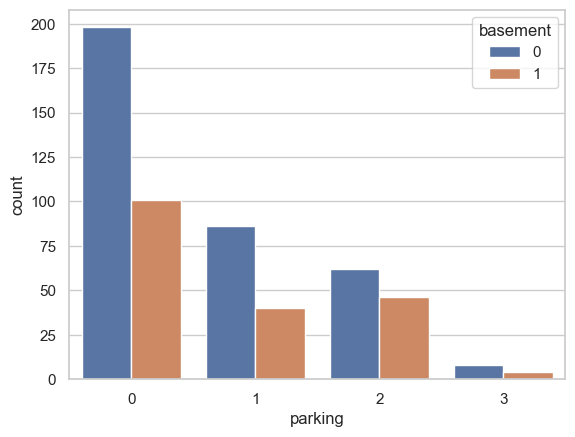

In [53]:
# sns.catplot(data = train, x = "basement", y = "bedrooms", hue = "parking", kind = "box")

# sns.distplot(train['parking'])
# sns.distplot(train['basement01'])
sns.countplot(x='parking', hue='basement', data=train)

## Furnished

In [54]:
train['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [55]:
train_fs = train[['furnishingstatus', 'Area_Group']].groupby(['furnishingstatus'], as_index = False).value_counts()
train_fs

,furnishingstatus,Area_Group,count
0,furnished,2000 - 4000,43
1,furnished,6000 - 8000,39
2,furnished,4000 - 6000,35
3,furnished,8000 - 10000,16
4,furnished,12000+,4
5,furnished,10000 - 12000,3
6,furnished,0-2000,0
7,semi-furnished,4000 - 6000,86
8,semi-furnished,2000 - 4000,76
9,semi-furnished,6000 - 8000,41


[Text(0, 0, '0-2000'),
 Text(1, 0, '2000 - 4000'),
 Text(2, 0, '4000 - 6000'),
 Text(3, 0, '6000 - 8000'),
 Text(4, 0, '8000 - 10000'),
 Text(5, 0, '10000 - 12000'),
 Text(6, 0, '12000+')]

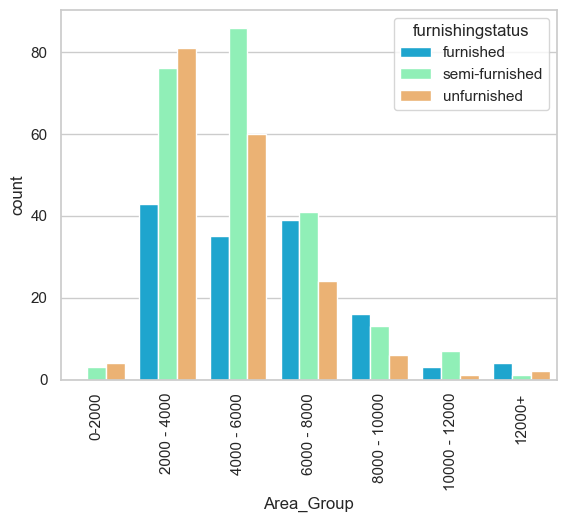

In [56]:
sns.barplot(x='Area_Group',y='count',data=train_fs, palette='rainbow', hue='furnishingstatus')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='center')

In [57]:
# train['price_group'] = pd.qcut(train['price'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
train.price_group.value_counts()
# train.price.count()

price_group
3325k - 6650k    354
1750k -3325k     114
6650k - 9975k     66
9975k+             8
Name: count, dtype: int64

[Text(0, 0, '1750k -3325k'),
 Text(1, 0, '3325k - 6650k'),
 Text(2, 0, '6650k - 9975k'),
 Text(3, 0, '9975k+')]

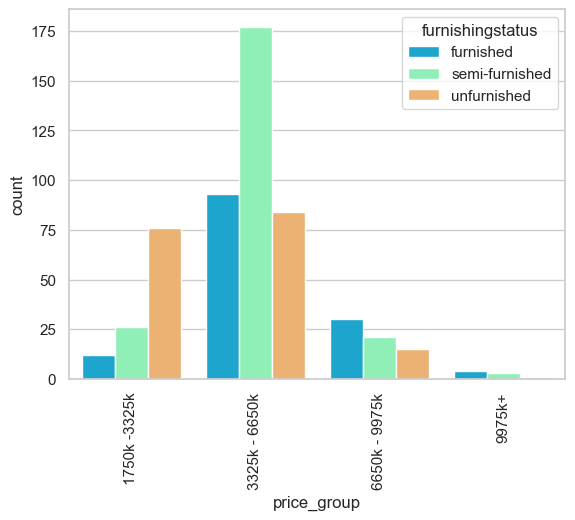

In [58]:
train_fsp = train[['furnishingstatus', 'price_group']].groupby(['furnishingstatus'], as_index = False).value_counts()
# train_fsp

sns.barplot(x='price_group',y='count',data=train_fsp, palette='rainbow', hue='furnishingstatus')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='center')

most of the semi furnished houses are in the range of 3325k - 6650k.
if someone is looking for a low budget house possibility of getting unfurnished is greater.
no unfurnished house in the range of 9975k+.
175 semi furnished houses are available in the range of 3325k - 6650k.
most number of furnished houses are also in the range of 3325k - 6650k.

In [59]:
label_encoder = LabelEncoder()
train['furnishingstatus'] = label_encoder.fit_transform(train['furnishingstatus'])
train['furnishingstatus'].head()

0    0
1    0
2    1
3    0
4    0
Name: furnishingstatus, dtype: int32

In [60]:
original_value = label_encoder.inverse_transform([2])
print(original_value)

['unfurnished']


0 = 'Furnished'; 1 = 'semi-furnished'; 2 = 'unfurnished'

## preferred area

In [61]:
train['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [62]:
round(train[['prefarea', 'price']].groupby(['prefarea']).mean())

,price
prefarea,
no,4425299.0
yes,5879046.0


prefarea has higher price.

In [63]:
label_encoder = LabelEncoder()
train['prefarea'] = label_encoder.fit_transform(train['prefarea'])
train['prefarea'].head()

0    1
1    0
2    1
3    1
4    0
Name: prefarea, dtype: int32

In [64]:
original_value = label_encoder.inverse_transform([0])
print(original_value)

['no']


0 = "no"; 1 = "Yes"

In [65]:
correlation = train['prefarea'].corr(train['price'])
print("Correlation between 'prefarea' and 'price':", correlation)

Correlation between 'prefarea' and 'price': 0.3297770498681074


In [66]:
prefarea_yes = train[train['prefarea'] == 1]
prefarea_yes.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_group,Area_Group,parking01
0,13300000,7420,4,2,3,yes,no,0,no,1,2,1,0,9975k+,6000 - 8000,2
2,12250000,9960,3,2,2,yes,no,1,no,0,2,1,1,9975k+,8000 - 10000,2
3,12215000,7500,4,2,2,yes,no,1,no,1,3,1,0,9975k+,6000 - 8000,3
5,10850000,7500,3,3,1,yes,no,1,no,1,2,1,1,9975k+,6000 - 8000,2
6,10150000,8580,4,3,4,yes,no,0,no,1,2,1,1,9975k+,8000 - 10000,2


In [67]:
prefarea_yes['hotwaterheating'].value_counts()

hotwaterheating
no     125
yes      3
Name: count, dtype: int64

In [68]:
prefarea_yes['mainroad'].value_counts()

mainroad
yes    126
no       2
Name: count, dtype: int64

In [69]:
prefarea_yes['airconditioning'].value_counts()

airconditioning
0    75
1    53
Name: count, dtype: int64

In [70]:
prefarea_yes['furnishingstatus'].value_counts()

furnishingstatus
1    52
0    43
2    33
Name: count, dtype: int64

In [71]:
prefarea_yes['guestroom'].value_counts()

guestroom
no     91
yes    37
Name: count, dtype: int64

In [72]:
price_area_group_yes = prefarea_yes[['price_group', 'Area_Group']].groupby(['price_group'], as_index = False).value_counts()
price_area_group_yes
price_area_group_total = train[['price_group', 'Area_Group']].groupby(['price_group'], as_index = False).value_counts()
price_area_group_total
price_area_group_merge = pd.merge(price_area_group_yes, price_area_group_total, how = 'right', on = ['price_group', 'Area_Group'])
price_area_group_merge.rename(columns = {'count_x': 'prefarea_yes', 'count_y': 'total'})

,price_group,Area_Group,prefarea_yes,total
0,1750k -3325k,2000 - 4000,2,76
1,1750k -3325k,4000 - 6000,1,25
2,1750k -3325k,0-2000,0,5
3,1750k -3325k,6000 - 8000,0,5
4,1750k -3325k,8000 - 10000,0,3
5,1750k -3325k,12000+,0,0
6,1750k -3325k,10000 - 12000,0,0
7,3325k - 6650k,4000 - 6000,21,130
8,3325k - 6650k,2000 - 4000,25,119
9,3325k - 6650k,6000 - 8000,38,71


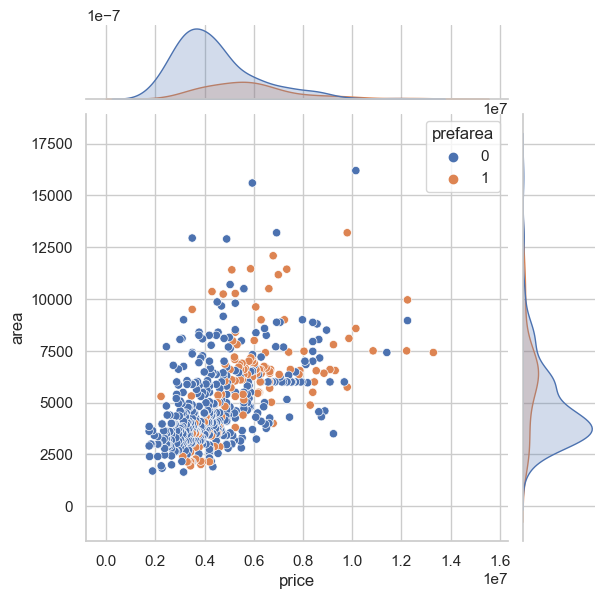

In [73]:
# sns.catplot(data = price_area_group_merge, x = "prefarea_yes", y = "total", hue = "Area_Group", kind = "box")
sns.jointplot(data=train, x="price", y="area", hue="prefarea")

In [74]:
mean_values = prefarea_yes[['price', 'area', 'bedrooms']].groupby(['bedrooms'], as_index = False).mean()
mean_values = mean_values.round({'price': 2, 'area': 2})
mean_values

,bedrooms,price,area
0,2,4572750.00,5638.94
1,3,5702617.61,5980.58
2,4,7476456.52,6737.35
3,5,5565000.00,5400.00


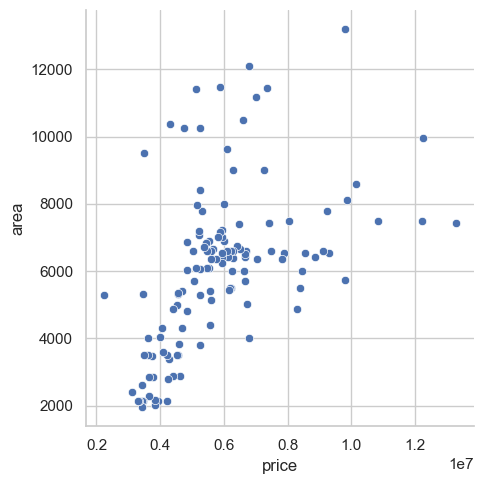

In [75]:
sns.relplot(data=prefarea_yes, x="price", y="area")
# plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='center')

this is the distribution of area vs price for preferred area as "yes", 1.majority of prefarea is 'no' (417).
2. prefarea is a personal view, so it may changes from one person to another.
3. hotwaterheating is not a big deal for prefarea.
4. mainroad, guestroom are important for prefarea.
5. 

In [76]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_group,Area_Group,parking01
0,13300000,7420,4,2,3,yes,no,0,no,1,2,1,0,9975k+,6000 - 8000,2
1,12250000,8960,4,4,4,yes,no,0,no,1,3,0,0,9975k+,8000 - 10000,3
2,12250000,9960,3,2,2,yes,no,1,no,0,2,1,1,9975k+,8000 - 10000,2
3,12215000,7500,4,2,2,yes,no,1,no,1,3,1,0,9975k+,6000 - 8000,3
4,11410000,7420,4,1,2,yes,yes,1,no,1,2,0,0,9975k+,6000 - 8000,2


In [77]:
lst = ['mainroad', 'guestroom', 'hotwaterheating', 'price_group', 'Area_Group']
for ix in lst:
    label_encoder = LabelEncoder()
    train[ix] = label_encoder.fit_transform(train[ix])

In [78]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_group,Area_Group,parking01
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,3,5,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,3,6,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,3,6,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,3,5,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,3,5,2


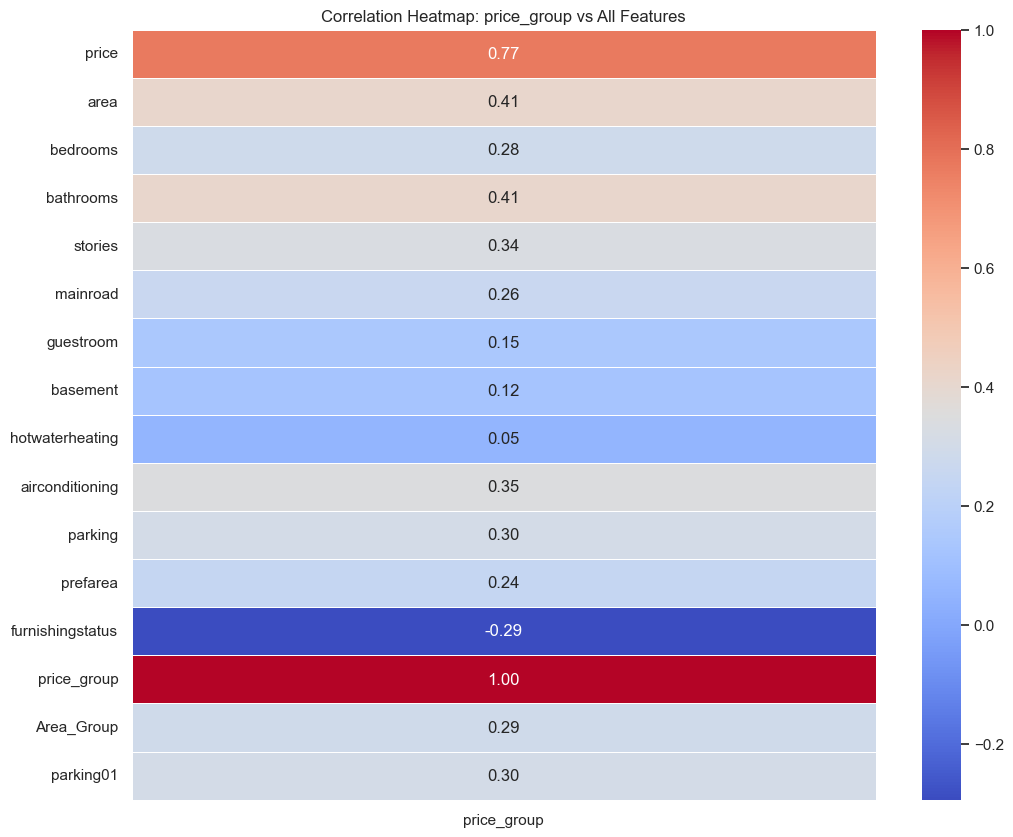

In [79]:
import matplotlib.pyplot as plt
correlation_matrix = train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['price_group']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: price_group vs All Features')
plt.show()

In [80]:
drop_lst = ['price_group', 'area', 'parking01']
train = train.drop(columns= drop_lst)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   stories           545 non-null    int64
 4   mainroad          545 non-null    int32
 5   guestroom         545 non-null    int32
 6   basement          545 non-null    int32
 7   hotwaterheating   545 non-null    int32
 8   airconditioning   545 non-null    int32
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int32
 11  furnishingstatus  545 non-null    int32
 12  Area_Group        545 non-null    int32
dtypes: int32(8), int64(5)
memory usage: 38.4 KB


## Feature Scaling

## Normalization

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.feature_selection import f_regression , SelectKBest 

In [83]:
Target = train.price
df_norm = train.drop(columns="price")

In [84]:
# Use MinMaxScaler to normalize DataFrame

scaler = MinMaxScaler(feature_range=(0,1))
Norm = scaler.fit_transform(df_norm)
df_normal = pd.DataFrame(Norm, columns=df_norm.columns)
df_normal.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Area_Group
0,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.833333
1,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000
2,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5,1.000000
3,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.833333
4,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.833333


In [85]:
df_normal.insert(1, 'price', Target)
df_normal.head()

,bedrooms,price,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Area_Group
0,0.6,13300000,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.833333
1,0.6,12250000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000
2,0.4,12250000,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5,1.000000
3,0.6,12215000,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.833333
4,0.6,11410000,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.833333


## Modeling

## Linear Regression

In [86]:
model = LinearRegression()

In [87]:
x = df_normal.drop ( "price", axis = 1 )
y = df_normal.price.values.reshape(-1,1)

In [88]:
def model (x,y):
    
    global x_train, x_test, y_train, y_test
    global y_pred , best_test_size , old_r2score
    old_r2score = 0
    for i in range(0, 8, 1):
        tester = 0.1 + (i*0.05)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tester, random_state=0)

        model_reg = LinearRegression()
        model_reg.fit (x_train , y_train)
        y_pred = model_reg.predict ( x_test )
        
        r2score = metrics.r2_score ( y_test, y_pred )
        
        if r2score > old_r2score :
                old_r2score = r2score
                best_test_size = tester
    
    
    if old_r2score != r2score:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=best_test_size, random_state=0)

        model_reg = LinearRegression()
        model_reg.fit (x_train , y_train)
        y_pred = model_reg.predict ( x_test )

In [89]:
def eval ():
    print ("Model :" , " Linear Regression" , "   " ,  "best test size :"  ,best_test_size )
    print("___________________________________ " )
    print("R2_score : ",old_r2score)
    print ( "Mean Absolute Error : ", metrics.mean_absolute_error ( y_test, y_pred ) )
    print ( "Mean Squared Error : ", metrics.mean_squared_error ( y_test, y_pred ) )
    print ( "Root Mean Squared Error : ", np.sqrt ( metrics.mean_squared_error ( y_test, y_pred ) ) )

In [90]:
model(x , y)
eval ()

Model :  Linear Regression     best test size : 0.30000000000000004
___________________________________ 
R2_score :  0.6328830157614145
Mean Absolute Error :  799737.1853068509
Mean Squared Error :  1273446046874.8164
Root Mean Squared Error :  1128470.6672638047


## Polynomial Features

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns=poly.get_feature_names_out())

In [92]:
list(poly.get_feature_names_out())

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'Area_Group',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms stories',
 'bedrooms mainroad',
 'bedrooms guestroom',
 'bedrooms basement',
 'bedrooms hotwaterheating',
 'bedrooms airconditioning',
 'bedrooms parking',
 'bedrooms prefarea',
 'bedrooms furnishingstatus',
 'bedrooms Area_Group',
 'bathrooms^2',
 'bathrooms stories',
 'bathrooms mainroad',
 'bathrooms guestroom',
 'bathrooms basement',
 'bathrooms hotwaterheating',
 'bathrooms airconditioning',
 'bathrooms parking',
 'bathrooms prefarea',
 'bathrooms furnishingstatus',
 'bathrooms Area_Group',
 'stories^2',
 'stories mainroad',
 'stories guestroom',
 'stories basement',
 'stories hotwaterheating',
 'stories airconditioning',
 'stories parking',
 'stories prefarea',
 'stories furnishingstatus',
 'stories Area_Group',
 'mainroad^2',
 'mainroad guestroom',
 'mai

In [93]:
# Removing the futures that have the least effect on the target
best_k = 0
best_score = 0
for k in range(11, 89) :
    new = SelectKBest(f_regression, k=k )
    x_new = new.fit_transform(x_poly, y)
    x_new = pd.DataFrame(x_new, columns=new.get_feature_names_out())
    model( x_new, y)
    
    score = metrics.r2_score(y_test, y_pred)
    if score>best_score :
        best_score = score
        best_k = k

new = SelectKBest(f_regression, k=best_k)
x_new = new.fit_transform(x_poly, y)
x_new = pd.DataFrame(x_new, columns=new.get_feature_names_out())
print("best k :" , best_k, "best score :" ,  best_score)

C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

best k : 55 best score : 0.6063161772369312


C:\Users\Anoop Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
print(x.shape)
print(x_poly.shape)
print(x_new.shape)

(545, 12)
(545, 90)
(545, 55)


In [95]:
x_new

,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus,Area_Group,bedrooms^2,...,airconditioning parking,airconditioning prefarea,airconditioning Area_Group,parking^2,parking prefarea,parking Area_Group,prefarea^2,prefarea Area_Group,furnishingstatus^2,Area_Group^2
0,0.6,0.333333,0.666667,1.0,1.0,0.666667,1.0,0.0,0.833333,0.36,...,0.666667,1.0,0.833333,0.444444,0.666667,0.555556,1.0,0.833333,0.00,0.694444
1,0.6,1.000000,1.000000,1.0,1.0,1.000000,0.0,0.0,1.000000,0.36,...,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.00,1.000000
2,0.4,0.333333,0.333333,1.0,0.0,0.666667,1.0,0.5,1.000000,0.16,...,0.000000,0.0,0.000000,0.444444,0.666667,0.666667,1.0,1.000000,0.25,1.000000
3,0.6,0.333333,0.333333,1.0,1.0,1.000000,1.0,0.0,0.833333,0.36,...,1.000000,1.0,0.833333,1.000000,1.000000,0.833333,1.0,0.833333,0.00,0.694444
4,0.6,0.000000,0.333333,1.0,1.0,0.666667,0.0,0.0,0.833333,0.36,...,0.666667,0.0,0.833333,0.444444,0.000000,0.555556,0.0,0.000000,0.00,0.694444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.2,0.000000,0.000000,1.0,0.0,0.666667,0.0,1.0,0.500000,0.04,...,0.000000,0.0,0.000000,0.444444,0.000000,0.333333,0.0,0.000000,1.00,0.250000
541,0.4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.500000,0.16,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.250000
542,0.2,0.000000,0.000000,1.0,0.0,0.000000,0.0,1.0,0.500000,0.04,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.00,0.250000
543,0.4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.500000,0.16,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.250000


In [96]:
model(x_new , y)
eval()

Model :  Linear Regression     best test size : 0.2
___________________________________ 
R2_score :  0.6063161772369312
Mean Absolute Error :  766457.2975260238
Mean Squared Error :  1134407088551.0315
Root Mean Squared Error :  1065085.4841518737
